In [ ]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

filename = "training_3digits.hdf5"
train = h5py.File(filename, 'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename, 'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename, 'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat_1 = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_flat_2 = test_images_2.reshape(test_images_2.shape[0], -1)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_classifier.fit(train_images_flat, train_digits)

test_pred_1 = mlp_classifier.predict(test_images_flat_1)
test_pred_2 = mlp_classifier.predict(test_images_flat_2)

accuracy_1 = accuracy_score(test_digits_1, test_pred_1)
accuracy_2 = accuracy_score(test_digits_2, test_pred_2)

print("Accuracy on test set 1:", accuracy_1)
print("Accuracy on test set 2:", accuracy_2)


Accuracy on test set 1: 1.0
Accuracy on test set 2: 0.0


Accuracy on test set 1: 1.0
Accuracy on test set 2: 0.0


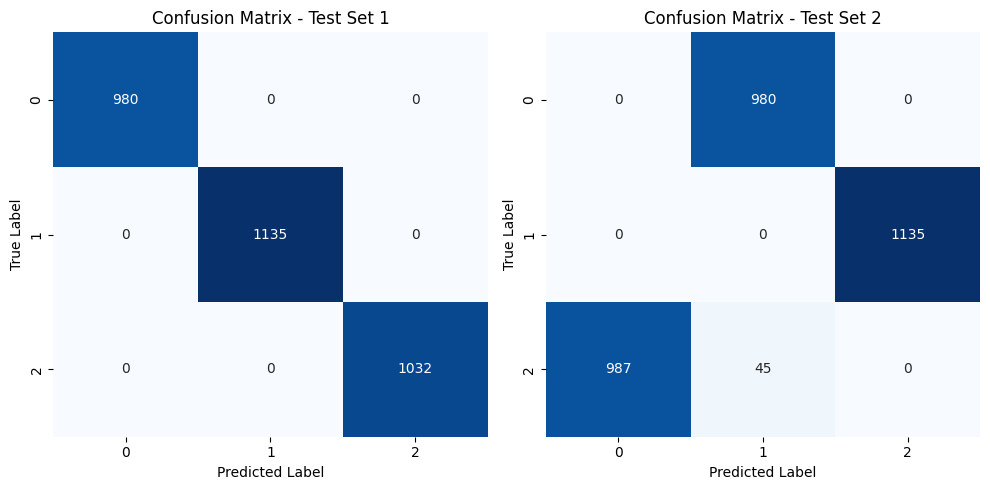

In [ ]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

filename = "training_3digits.hdf5"
train = h5py.File(filename, 'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename, 'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename, 'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat_1 = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_flat_2 = test_images_2.reshape(test_images_2.shape[0], -1)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_classifier.fit(train_images_flat, train_digits)

test_pred_1 = mlp_classifier.predict(test_images_flat_1)
test_pred_2 = mlp_classifier.predict(test_images_flat_2)

accuracy_1 = accuracy_score(test_digits_1, test_pred_1)
accuracy_2 = accuracy_score(test_digits_2, test_pred_2)

print("Accuracy on test set 1:", accuracy_1)
print("Accuracy on test set 2:", accuracy_2)

conf_matrix_1 = confusion_matrix(test_digits_1, test_pred_1)
conf_matrix_2 = confusion_matrix(test_digits_2, test_pred_2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_1, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix - Test Set 1")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_2, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix - Test Set 2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


Accuracy on test set 1: 1.0
Accuracy on test set 2: 0.0


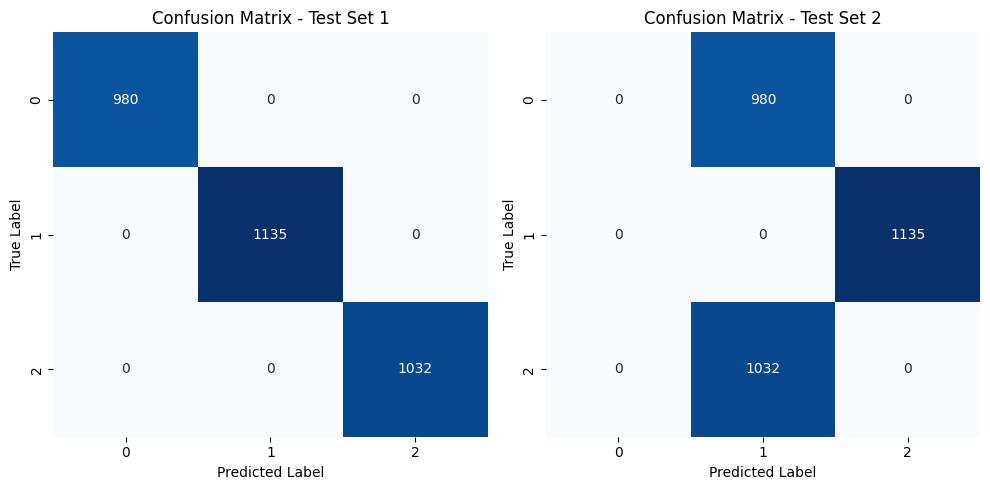

In [ ]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

filename = "training_3digits.hdf5"
train = h5py.File(filename, 'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename, 'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename, 'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat_1 = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_flat_2 = test_images_2.reshape(test_images_2.shape[0], -1)

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled_1 = scaler.transform(test_images_flat_1)
test_images_scaled_2 = scaler.transform(test_images_flat_2)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.0001, solver='adam', random_state=42)
mlp_classifier.fit(train_images_scaled, train_digits)

test_pred_1 = mlp_classifier.predict(test_images_scaled_1)
test_pred_2 = mlp_classifier.predict(test_images_scaled_2)

accuracy_1 = accuracy_score(test_digits_1, test_pred_1)
accuracy_2 = accuracy_score(test_digits_2, test_pred_2)

print("Accuracy on test set 1:", accuracy_1)
print("Accuracy on test set 2:", accuracy_2)

conf_matrix_1 = confusion_matrix(test_digits_1, test_pred_1)
conf_matrix_2 = confusion_matrix(test_digits_2, test_pred_2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_1, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix - Test Set 1")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_2, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix - Test Set 2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


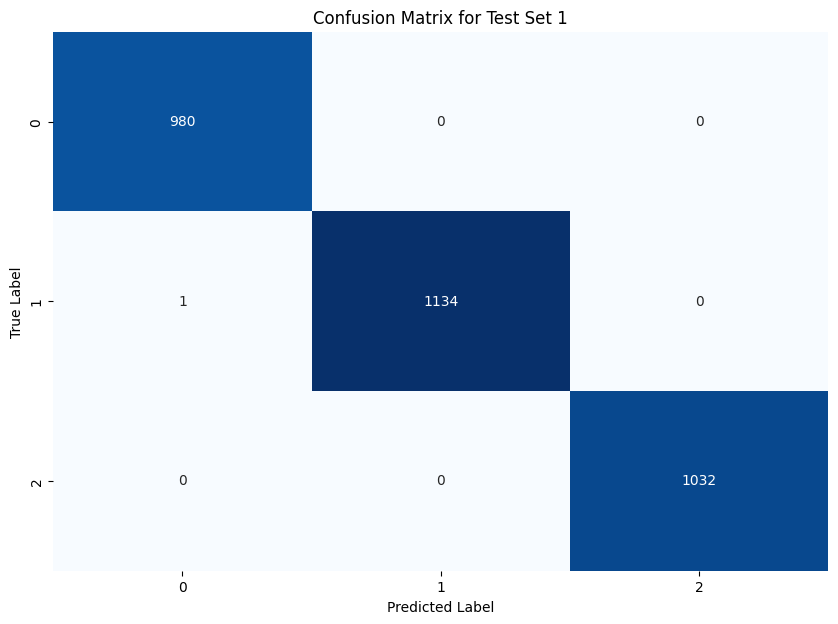

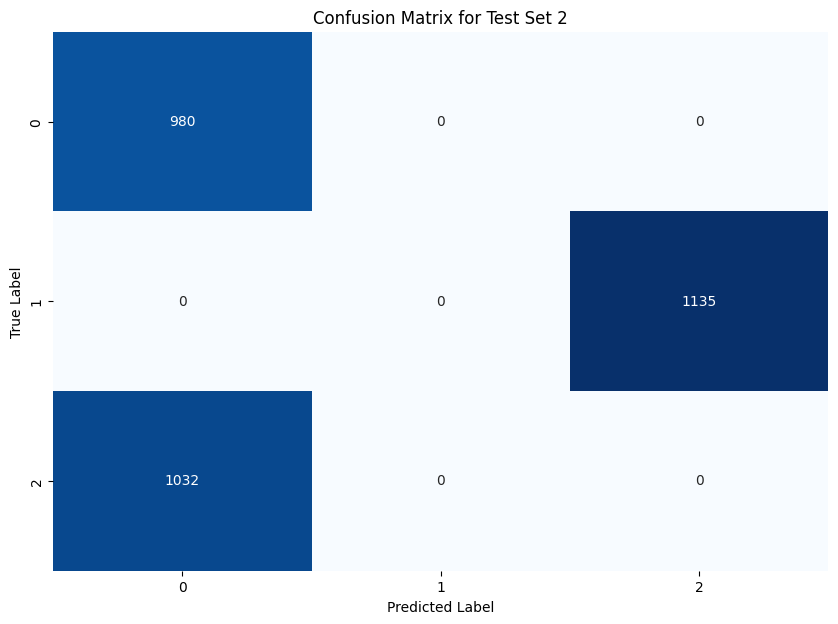

Accuracy on test set 1: 99.97%
Accuracy on test set 2: 31.14%
Training set accuracy: 100.00%


In [1]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filename):
    with h5py.File(filename, 'r') as f:
        images = np.array(f['images'])
        digits = np.array(f['digits'])
    return images, digits

train_images, train_digits = load_data("training_3digits.hdf5")
test_images_1, test_digits_1 = load_data("testing_3digits_part1.hdf5")
test_images_2, test_digits_2 = load_data("testing_3digits_part2.hdf5")

scaler = StandardScaler()
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_1_flattened = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_2_flattened = test_images_2.reshape(test_images_2.shape[0], -1)

scaler.fit(train_images_flattened)
train_images_norm = scaler.transform(train_images_flattened)
test_images_1_norm = scaler.transform(test_images_1_flattened)
test_images_2_norm = scaler.transform(test_images_2_flattened)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(train_images_norm, train_digits)

predictions_1 = mlp.predict(test_images_1_norm)
predictions_2 = mlp.predict(test_images_2_norm)
accuracy_1 = accuracy_score(test_digits_1, predictions_1)
accuracy_2 = accuracy_score(test_digits_2, predictions_2)

conf_matrix_1 = confusion_matrix(test_digits_1, predictions_1)
conf_matrix_2 = confusion_matrix(test_digits_2, predictions_2)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(conf_matrix_1, "Confusion Matrix for Test Set 1")
plot_confusion_matrix(conf_matrix_2, "Confusion Matrix for Test Set 2")



print(f"Accuracy on test set 1: {accuracy_1*100:.2f}%")

print(f"Accuracy on test set 2: {accuracy_2*100:.2f}%")

train_predictions = mlp.predict(train_images_norm)
train_accuracy = accuracy_score(train_digits, train_predictions)
print(f"Training set accuracy: {train_accuracy*100:.2f}%")

